In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy as sc
import math

plots_dir = 'W:\\lab_winter\\private\\Experiments\\Matthias_MB\\2018\\MB18_56 QuantSeq merge analysis\\plots\\' # directory for output plots

In [ ]:
#######################################
#### load in l2fc & make rnk files ####    # the l2fc here is calculated manually, as DESeq l2fc are somehow wrong!
#######################################
manual_l2fc = pd.read_excel('W:\\lab_winter\\private\\Experiments\\Matthias_MB\\2018\\MB18_56 QuantSeq merge analysis\\data\\8MEDs_3drugs_l2fc_manual_for_violinplot.xlsx')

# this is a dictionary of ENSEMBL IDs which have a unique HGNC symbol (but one HGNC symbol can have multiple ENSEMBL IDs!)
ENSEMBL_to_HGNC = pd.read_csv("T:\\groups\\lab_winter\\reference_files\\geneID_dictionaries\\ENSEMBL-Gene-Stable-ID_to_HGNC-Symbol.txt", sep="\t")
ENSEMBL_to_HGNC.columns = ['ENSG', 'HGNC']
ENSEMBL_to_HGNC = ENSEMBL_to_HGNC.drop_duplicates('ENSG').set_index('ENSG', verify_integrity=True) # we lose 7 IDs because they occur more than once

for condition in ['MED14', 'CDK9', 'WT_ZZ_133b', 'WT_dBET6']:
    # get log2FC for each geneID
    rank_df = manual_l2fc[['geneID','{0}_l2fc'.format(condition)]].dropna()
    # get the HGNC gene name for each ENSEMBL ID
    rank_df = rank_df.join(ENSEMBL_to_HGNC, on='geneID')
    # remove entries without HGNC name
    rank_df = rank_df[~rank_df.HGNC.isnull()]
    # retain only HGNC name and log2FC
    rank_df = rank_df.set_index('HGNC').drop('geneID', axis=1)

    #rank_df.to_csv("W:\\lab_winter\\private\\Experiments\\Matthias_MB\\2018\\MB18_56 QuantSeq merge analysis\\data\\GSEA_l2fc_rank_tables\\{0}_manuallog2FC_ranked_for_GSEA.rnk".format(condition), sep="\t", header=False) #### this file is used as input for Broad's GenePattern tool (GSEApreranked module with standard settings)

In [86]:
###################################
#### load in GSEA output files ####
###################################

##### MED14 GO terms
MED14_KEGG_pathway = pd.read_csv("W:\\lab_winter\\private\\Experiments\\Matthias_MB\\2018\\MB18_56 QuantSeq merge analysis\\GSEA\\MED14_manual_l2fc\\MED14_GSEA_KEGG_down.txt", sep="\t")
MED14_KEGG_pathway = MED14_KEGG_pathway.loc[:,['NAME','SIZE','ES','NES','NOM p-val', 'FDR q-val']].set_index('NAME').rename(columns={'NOM p-val':'p_value', 'FDR q-val':'q_value'})

MED14_GO_PROCESS = pd.read_csv("W:\\lab_winter\\private\\Experiments\\Matthias_MB\\2018\\MB18_56 QuantSeq merge analysis\\GSEA\\MED14_manual_l2fc\\MED14_GSEA_GO_PROCESS_down.txt", sep="\t")
MED14_GO_PROCESS = MED14_GO_PROCESS.loc[:,['NAME','SIZE','ES','NES','NOM p-val', 'FDR q-val']].set_index('NAME').rename(columns={'NOM p-val':'p_value', 'FDR q-val':'q_value'})

MED14_GO_FUNCTION = pd.read_csv("W:\\lab_winter\\private\\Experiments\\Matthias_MB\\2018\\MB18_56 QuantSeq merge analysis\\GSEA\\MED14_manual_l2fc\\MED14_GSEA_GO_FUNCTION_down.txt", sep="\t")
MED14_GO_FUNCTION = MED14_GO_FUNCTION.loc[:,['NAME','SIZE','ES','NES','NOM p-val', 'FDR q-val']].set_index('NAME').rename(columns={'NOM p-val':'p_value', 'FDR q-val':'q_value'})

MED14_TF_targets = pd.read_csv("W:\\lab_winter\\private\\Experiments\\Matthias_MB\\2018\\MB18_56 QuantSeq merge analysis\\GSEA\\MED14_manual_l2fc\\MED14_GSEA_TF_targets_down.txt", sep="\t")
MED14_TF_targets = MED14_TF_targets.loc[:,['NAME','SIZE','ES','NES','NOM p-val', 'FDR q-val']].set_index('NAME').rename(columns={'NOM p-val':'p_value', 'FDR q-val':'q_value'})

MED14_combined_df = MED14_KEGG_pathway[MED14_KEGG_pathway.q_value < 0.25]
#MED14_combined_df = MED14_KEGG_pathway[MED14_KEGG_pathway.q_value < 0.25].append(MED14_GO_FUNCTION[MED14_GO_FUNCTION.q_value < 0.25]).append(MED14_GO_PROCESS[MED14_GO_PROCESS.q_value < 0.25]).append(MED14_TF_targets[MED14_TF_targets.q_value < 0.25])

##### CDK9-dTAG GO terms
CDK9_KEGG_pathway = pd.read_csv("W:\\lab_winter\\private\\Experiments\\Matthias_MB\\2018\\MB18_56 QuantSeq merge analysis\\GSEA\\CDK9_manual_l2fc\\CDK9_GSEA_KEGG_down.txt", sep="\t")
CDK9_KEGG_pathway = CDK9_KEGG_pathway.loc[:,['NAME','SIZE','ES','NES','NOM p-val', 'FDR q-val']].set_index('NAME').rename(columns={'NOM p-val':'p_value', 'FDR q-val':'q_value'})

CDK9_GO_PROCESS = pd.read_csv("W:\\lab_winter\\private\\Experiments\\Matthias_MB\\2018\\MB18_56 QuantSeq merge analysis\\GSEA\\CDK9_manual_l2fc\\CDK9_GSEA_GO_PROCESS_down.txt", sep="\t")
CDK9_GO_PROCESS = CDK9_GO_PROCESS.loc[:,['NAME','SIZE','ES','NES','NOM p-val', 'FDR q-val']].set_index('NAME').rename(columns={'NOM p-val':'p_value', 'FDR q-val':'q_value'})

CDK9_GO_FUNCTION = pd.read_csv("W:\\lab_winter\\private\\Experiments\\Matthias_MB\\2018\\MB18_56 QuantSeq merge analysis\\GSEA\\CDK9_manual_l2fc\\CDK9_GSEA_GO_FUNCTION_down.txt", sep="\t")
CDK9_GO_FUNCTION = CDK9_GO_FUNCTION.loc[:,['NAME','SIZE','ES','NES','NOM p-val', 'FDR q-val']].set_index('NAME').rename(columns={'NOM p-val':'p_value', 'FDR q-val':'q_value'})

CDK9_TF_targets = pd.read_csv("W:\\lab_winter\\private\\Experiments\\Matthias_MB\\2018\\MB18_56 QuantSeq merge analysis\\GSEA\\CDK9_manual_l2fc\\CDK9_GSEA_TF_targets_down.txt", sep="\t")
CDK9_TF_targets = CDK9_TF_targets.loc[:,['NAME','SIZE','ES','NES','NOM p-val', 'FDR q-val']].set_index('NAME').rename(columns={'NOM p-val':'p_value', 'FDR q-val':'q_value'})

CDK9_combined_df = CDK9_KEGG_pathway.append(CDK9_GO_FUNCTION).append(CDK9_GO_PROCESS).append(CDK9_TF_targets)

##### ZZ_133b GO terms
dCDK9_KEGG_pathway = pd.read_csv("W:\\lab_winter\\private\\Experiments\\Matthias_MB\\2018\\MB18_56 QuantSeq merge analysis\\GSEA\\WT_ZZ_133b_manual_l2fc\\WT_ZZ_133b_GSEA_KEGG_down.txt", sep="\t")
dCDK9_KEGG_pathway = dCDK9_KEGG_pathway.loc[:,['NAME','SIZE','ES','NES','NOM p-val', 'FDR q-val']].set_index('NAME').rename(columns={'NOM p-val':'p_value', 'FDR q-val':'q_value'})

dCDK9_GO_PROCESS = pd.read_csv("W:\\lab_winter\\private\\Experiments\\Matthias_MB\\2018\\MB18_56 QuantSeq merge analysis\\GSEA\\WT_ZZ_133b_manual_l2fc\\WT_ZZ_133b_GSEA_GO_PROCESS_down.txt", sep="\t")
dCDK9_GO_PROCESS = dCDK9_GO_PROCESS.loc[:,['NAME','SIZE','ES','NES','NOM p-val', 'FDR q-val']].set_index('NAME').rename(columns={'NOM p-val':'p_value', 'FDR q-val':'q_value'})

dCDK9_GO_FUNCTION = pd.read_csv("W:\\lab_winter\\private\\Experiments\\Matthias_MB\\2018\\MB18_56 QuantSeq merge analysis\\GSEA\\WT_ZZ_133b_manual_l2fc\\WT_ZZ_133b_GSEA_GO_FUNCTION_down.txt", sep="\t")
dCDK9_GO_FUNCTION = dCDK9_GO_FUNCTION.loc[:,['NAME','SIZE','ES','NES','NOM p-val', 'FDR q-val']].set_index('NAME').rename(columns={'NOM p-val':'p_value', 'FDR q-val':'q_value'})

dCDK9_TF_targets = pd.read_csv("W:\\lab_winter\\private\\Experiments\\Matthias_MB\\2018\\MB18_56 QuantSeq merge analysis\\GSEA\\WT_ZZ_133b_manual_l2fc\\WT_ZZ_133b_GSEA_TF_targets_down.txt", sep="\t")
dCDK9_TF_targets = dCDK9_TF_targets.loc[:,['NAME','SIZE','ES','NES','NOM p-val', 'FDR q-val']].set_index('NAME').rename(columns={'NOM p-val':'p_value', 'FDR q-val':'q_value'})

dCDK9_combined_df = dCDK9_KEGG_pathway.append(dCDK9_GO_FUNCTION).append(dCDK9_GO_PROCESS).append(dCDK9_TF_targets)

##### dBET6 GO terms
dBET6_KEGG_pathway = pd.read_csv("W:\\lab_winter\\private\\Experiments\\Matthias_MB\\2018\\MB18_56 QuantSeq merge analysis\\GSEA\\WT_dBET6_manual_l2fc\\WT_dBET6_GSEA_KEGG_down.txt", sep="\t")
dBET6_KEGG_pathway = dBET6_KEGG_pathway.loc[:,['NAME','SIZE','ES','NES','NOM p-val', 'FDR q-val']].set_index('NAME').rename(columns={'NOM p-val':'p_value', 'FDR q-val':'q_value'})

dBET6_GO_PROCESS = pd.read_csv("W:\\lab_winter\\private\\Experiments\\Matthias_MB\\2018\\MB18_56 QuantSeq merge analysis\\GSEA\\WT_dBET6_manual_l2fc\\WT_dBET6_GSEA_GO_PROCESS_down.txt", sep="\t")
dBET6_GO_PROCESS = dBET6_GO_PROCESS.loc[:,['NAME','SIZE','ES','NES','NOM p-val', 'FDR q-val']].set_index('NAME').rename(columns={'NOM p-val':'p_value', 'FDR q-val':'q_value'})

dBET6_GO_FUNCTION = pd.read_csv("W:\\lab_winter\\private\\Experiments\\Matthias_MB\\2018\\MB18_56 QuantSeq merge analysis\\GSEA\\WT_dBET6_manual_l2fc\\WT_dBET6_GSEA_GO_FUNCTION_down.txt", sep="\t")
dBET6_GO_FUNCTION = dBET6_GO_FUNCTION.loc[:,['NAME','SIZE','ES','NES','NOM p-val', 'FDR q-val']].set_index('NAME').rename(columns={'NOM p-val':'p_value', 'FDR q-val':'q_value'})

dBET6_TF_targets = pd.read_csv("W:\\lab_winter\\private\\Experiments\\Matthias_MB\\2018\\MB18_56 QuantSeq merge analysis\\GSEA\\WT_dBET6_manual_l2fc\\WT_dBET6_GSEA_TF_targets_down.txt", sep="\t")
dBET6_TF_targets = dBET6_TF_targets.loc[:,['NAME','SIZE','ES','NES','NOM p-val', 'FDR q-val']].set_index('NAME').rename(columns={'NOM p-val':'p_value', 'FDR q-val':'q_value'})

dBET6_combined_df = dBET6_KEGG_pathway.append(dBET6_GO_FUNCTION).append(dBET6_GO_PROCESS).append(dBET6_TF_targets)


In [118]:
FDR_df = pd.DataFrame(MED14_combined_df['q_value'])
FDR_df = FDR_df.join(CDK9_combined_df.q_value, rsuffix="_CDK9")
FDR_df = FDR_df.join(dCDK9_combined_df.q_value, rsuffix="_dCDK9")
FDR_df = FDR_df.join(dBET6_combined_df.q_value, lsuffix="_MED14", rsuffix="_dBET6")
FDR_df = FDR_df.replace(np.nan, 1.0)

In [88]:
log_FDR_df = -1 * np.log10(FDR_df)
log_FDR_df = log_FDR_df.replace(np.nan, 0.0)
log_FDR_df = log_FDR_df.replace([np.inf, -np.inf], np.nan).dropna()

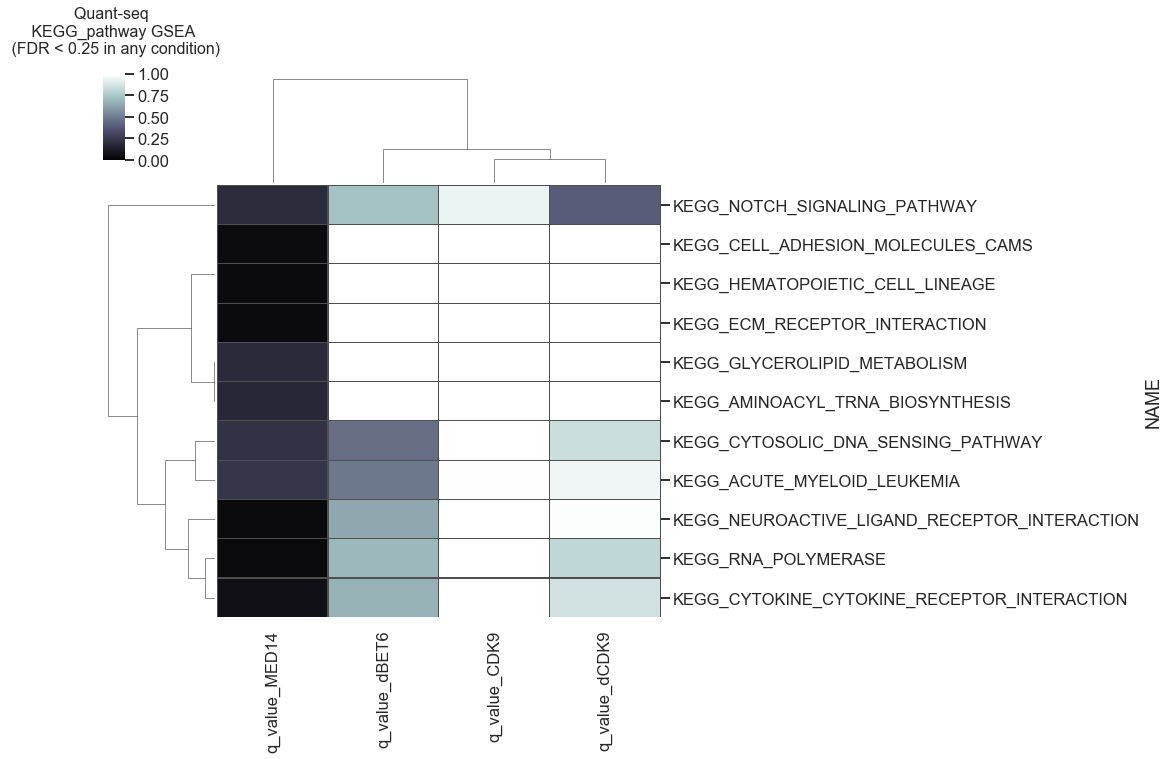

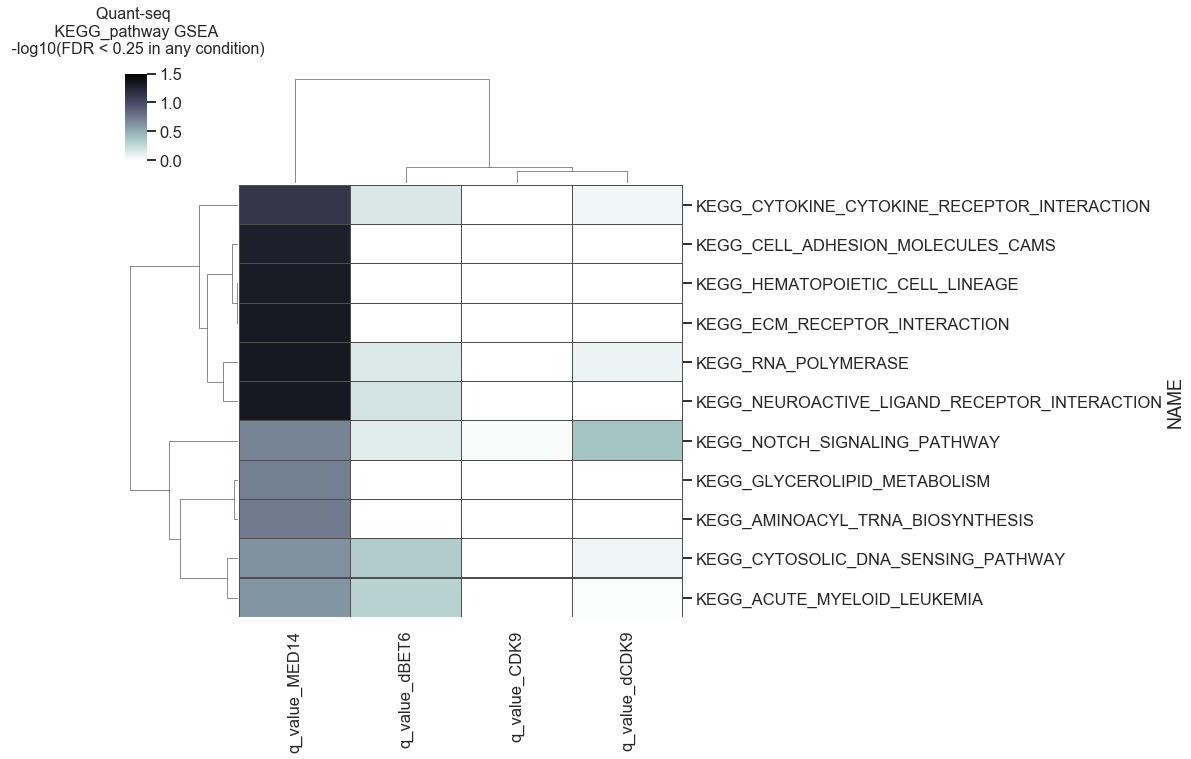

In [158]:
##### finally plot
plt.close('all')
sns.set_style('white')
sns.set_context('talk')

sns.clustermap(FDR_df, cmap="bone", vmin=0., linewidths=0.1, linecolor="#4f4f4f", cbar_kws={"ticks": np.arange(0.,1.1,0.25)})

plt.title('Quant-seq \n KEGG_pathway GSEA \n (FDR < 0.25 in any condition)', fontsize = 16, pad=20)
plt.show()
#plt.savefig(plots_dir + 'GSEA_plots\\Quant-seq_MED14-CDK9-dCDK9-dBET6_manual-log2FC_KEGGpathway_GSEA_FDR_lines.pdf', dpi=300)
#plt.savefig(plots_dir + 'GSEA_plots\\Quant-seq_MED14-CDK9-dCDK9-dBET6_manual-log2FC_KEGGpathway_GSEA_FDR_lines.png', dpi=300)

### same with log10_FDR
sns.clustermap(log_FDR_df, cmap="bone_r", vmax=1.5, linewidths=0.1, linecolor="#4f4f4f", cbar_kws={"ticks": np.arange(0.,1.6,0.5)}) #, color = plot_df['color'], edgecolor = ['k' for i in plot_df.index])

plt.title('Quant-seq \n KEGG_pathway GSEA \n -log10(FDR < 0.25 in any condition)', fontsize = 16, pad=20)
plt.show()
#plt.savefig(plots_dir + 'GSEA_plots\\Quant-seq_MED14-CDK9-dCDK9-dBET6_manual-log2FC_KEGGpathway_GSEA_logFDR_lines.pdf', dpi=300)
#plt.savefig(plots_dir + 'GSEA_plots\\Quant-seq_MED14-CDK9-dCDK9-dBET6_manual-log2FC_KEGGpathway_GSEA_logFDR_lines.png', dpi=300)